In [1]:
import pandas as pd
import numpy as np
import fix_yahoo_finance as yf 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## For this notebook, I'll be using a module from python.org called fix_yahoo_finance that is, as its name would imply, a fix for the deprecated Yahoo Finance api.

In [2]:
 aobc = yf.download('AOBC','2013-01-01','2018-03-31')


[*********************100%***********************]  1 of 1 downloaded


In [3]:
aobc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,8.93,8.95,8.51,8.54,8.54,4875000
2013-01-03,8.65,8.93,8.54,8.77,8.77,5051200
2013-01-04,8.90,8.96,8.71,8.80,8.80,3799700
2013-01-07,8.88,8.89,8.46,8.64,8.64,3773900
2013-01-08,8.65,8.78,8.58,8.76,8.76,2932200


In [4]:
aobc.shape

(1320, 6)

### I'll go ahead and save this dataframe as a CSV file so that I don't have to keep re-downloading this data.

In [5]:
aobc.to_csv('aobc.csv')

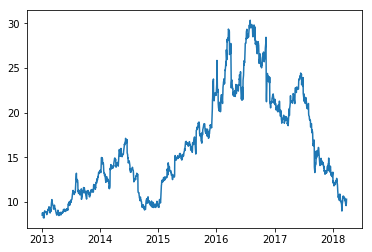

In [6]:
plt.plot(aobc.Close)

In [7]:
rgr = yf.download('RGR','2013-01-01','2018-03-31')

[*********************100%***********************]  1 of 1 downloaded


In [8]:
rgr.to_csv('rgr.csv')

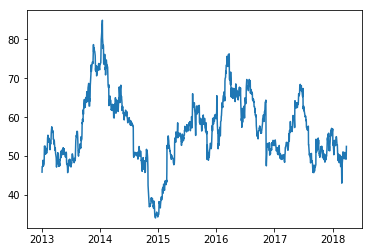

In [9]:
plt.plot(rgr.Close)

In [10]:
vsto = yf.download('VSTO', '2013-01-01','2018-03-01')

[*********************100%***********************]  1 of 1 downloaded


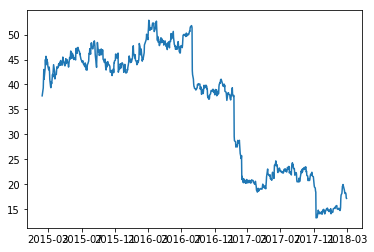

In [11]:
plt.plot(vsto.Close)

In [14]:
guns = pd.read_csv('../guns2.csv')

In [15]:
guns2 = guns.set_index('date')

In [16]:
guns2.columns

Index(['state', 'city_or_county', 'address', 'n_killed', 'n_injured',
       'incident_url', 'source_url', 'incident_url_fields_missing',
       'congressional_district', 'gun_stolen', 'gun_type',
       'incident_characteristics', 'latitude', 'location_description',
       'longitude', 'n_guns_involved', 'notes', 'participant_age',
       'participant_age_group', 'participant_gender', 'participant_name',
       'participant_relationship', 'participant_status', 'participant_type',
       'sources', 'state_house_district', 'state_senate_district'],
      dtype='object')

In [17]:
guns2 = guns2[['n_killed', 'state', 'city_or_county']]

In [18]:
gd_state = guns2.groupby('state')[['n_killed']].count()
gd_state

,n_killed
state,
Alabama,5471
Alaska,1349
Arizona,2328
Arkansas,2842
California,16306
Colorado,3201
Connecticut,3067
Delaware,1685
District of Columbia,3195


In [19]:
gd_state.to_csv('gd_state.csv')

In [20]:
sorted_gd = gd_state.n_killed.sort_values()

In [21]:
pd.DataFrame(sorted_gd).to_csv('gun_deaths_by_state.csv')

In [ ]:
fig, ax = plt.figure(figsize=(15,10)), plt.gca()
sns.set_style("white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.barh(sorted_gd.index, sorted_gd, color = 'darkorange', alpha =.7, align='center', lw=.5)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Gun Deaths by State", fontsize=30)
plt.tight_layout()


In [23]:
gd_by_date = guns.groupby('date')[['n_killed']].max()

In [24]:
gd_by_date.tail()

,n_killed
date,
2018-03-27,2
2018-03-28,2
2018-03-29,3
2018-03-30,2
2018-03-31,2


In [25]:
gd_by_date[gd_by_date['n_killed'] > 10]

,n_killed
date,
2013-09-16,11
2015-12-02,16
2016-06-12,50
2017-11-05,27
2018-02-14,17


In [26]:
aobc.loc['2017-09-28':'2017-10-07','Close']

Date
2017-09-28    15.450000
2017-09-29    15.250000
2017-10-02    15.740000
2017-10-03    16.120001
2017-10-04    16.110001
2017-10-05    16.030001
2017-10-06    15.700000
Name: Close, dtype: float64

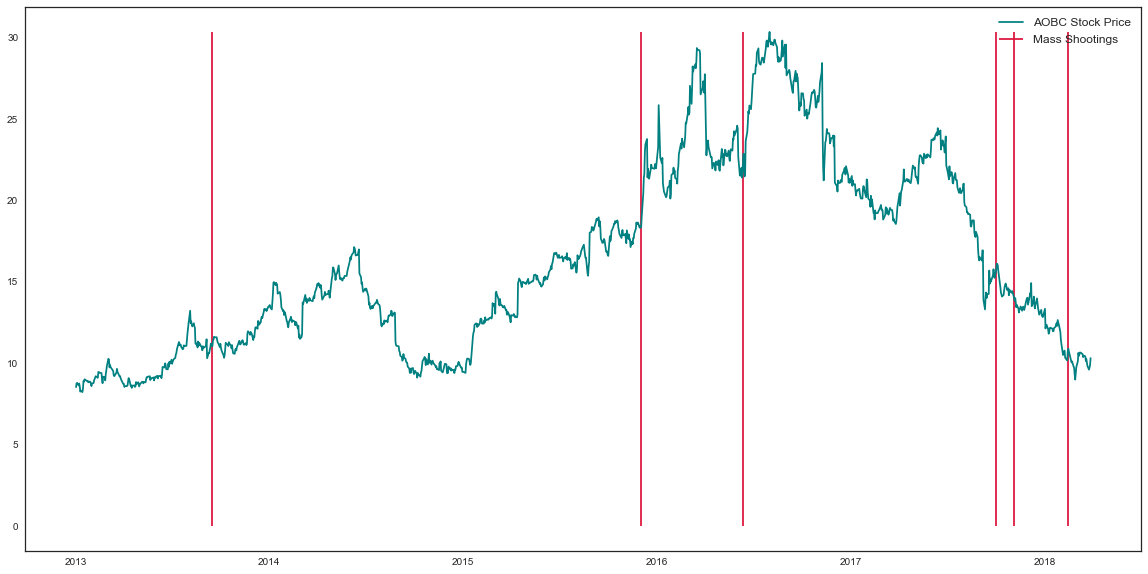

In [36]:
plt.figure(figsize=(20,10))
plt.plot(aobc.Close, color= "teal", label="AOBC Stock Price")
plt.vlines(gd_by_date[gd_by_date['n_killed'] > 10].index, ymin=0, ymax=aobc.Close.max(), color = "crimson", label="Mass Shootings")
plt.legend(fontsize=12)

In [28]:
gd_by_date.loc['2017-10-01','n_killed']=61

In [29]:
mass = pd.read_csv('mass2.csv')

In [30]:
mass.set_index('Incident Date', inplace=True)

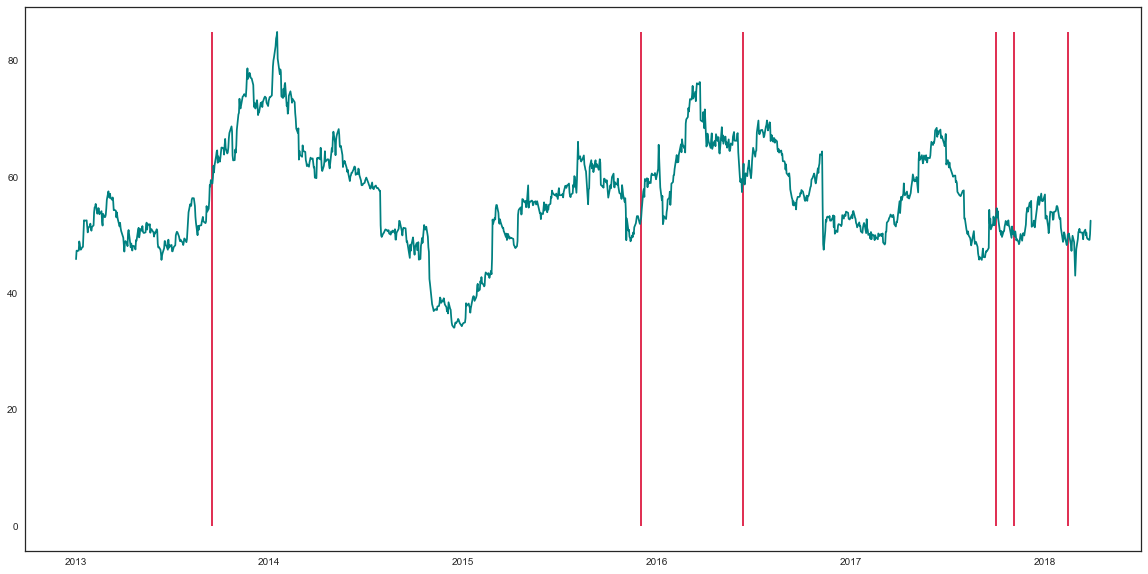

In [35]:
plt.figure(figsize=(20,10))
plt.plot(rgr.Close, color='teal')
plt.vlines(gd_by_date[gd_by_date['n_killed'] > 10].index, ymin=0, ymax=rgr.Close.max(), color='crimson')